In [1]:
import warnings

warnings.filterwarnings("ignore")

# Introduction

A food delivery company has an app that allows customers to order food to their doorsteps. The company has issued a survey to their customers to see how happy they are with the service. There are 6 questions in the survey, and customers can give a rating from 1 to 5 for each question (higher number means a more positive response).



1.   Was my order delivered on time (X1)?
2.   Are the contents of my order what I expected (X2)?
3.   Was I able to order everything I wanted to order (X3)?
4.   Did I pay a good price for my order (X4)?
5.   Am I satisfied with my courier (X5)?
6.   Did the app make ordering easy for me (X6)?

There is one more question in the survey asking if the customer was happy with the service overall. This is a simple yes or no answer (1 for yes, 0 for no).

The company has asked us to figure out which of the 6 questions are the best predictors of whether a customer is happy with the service. This project allows the company to figure out what aspects of the service to focus on to improve customer happiness, and reduce the survey questions so they can get more responses from more customers quickly.



# Exploratory Data Analysis

In [2]:
import pandas as pd
data = pd.read_csv('ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
data.shape

(126, 7)

126 customers have responded to the survey. Let's see how they responded.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to plot histograms and boxplots for each column
def plot_histograms_and_boxplots(df):
    num_columns = len(df.columns)

    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(2, num_columns, figsize=(4*num_columns, 8))

    for i, column in enumerate(df.columns):
        # Histogram
        sns.histplot(df[column], discrete=True, ax=axes[0, i])
        axes[0, i].set_title(f'Histogram of {column}')

        # Boxplot
        sns.boxplot(x=df[column], ax=axes[1, i])
        axes[1, i].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

plot_histograms_and_boxplots(data)

ModuleNotFoundError: No module named 'seaborn'

Per the Y histogram, almost half of the customers are unhappy. We want to know why these customers are happy, and what we can do to make them happy. Specifically, we want to know which questions help distinguish happy and unhappy customers.







## Unhappy Customers

In [ ]:
unhappy_data = data[data['Y'] == 0]
unhappy_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
6,0,3,1,2,2,1,3


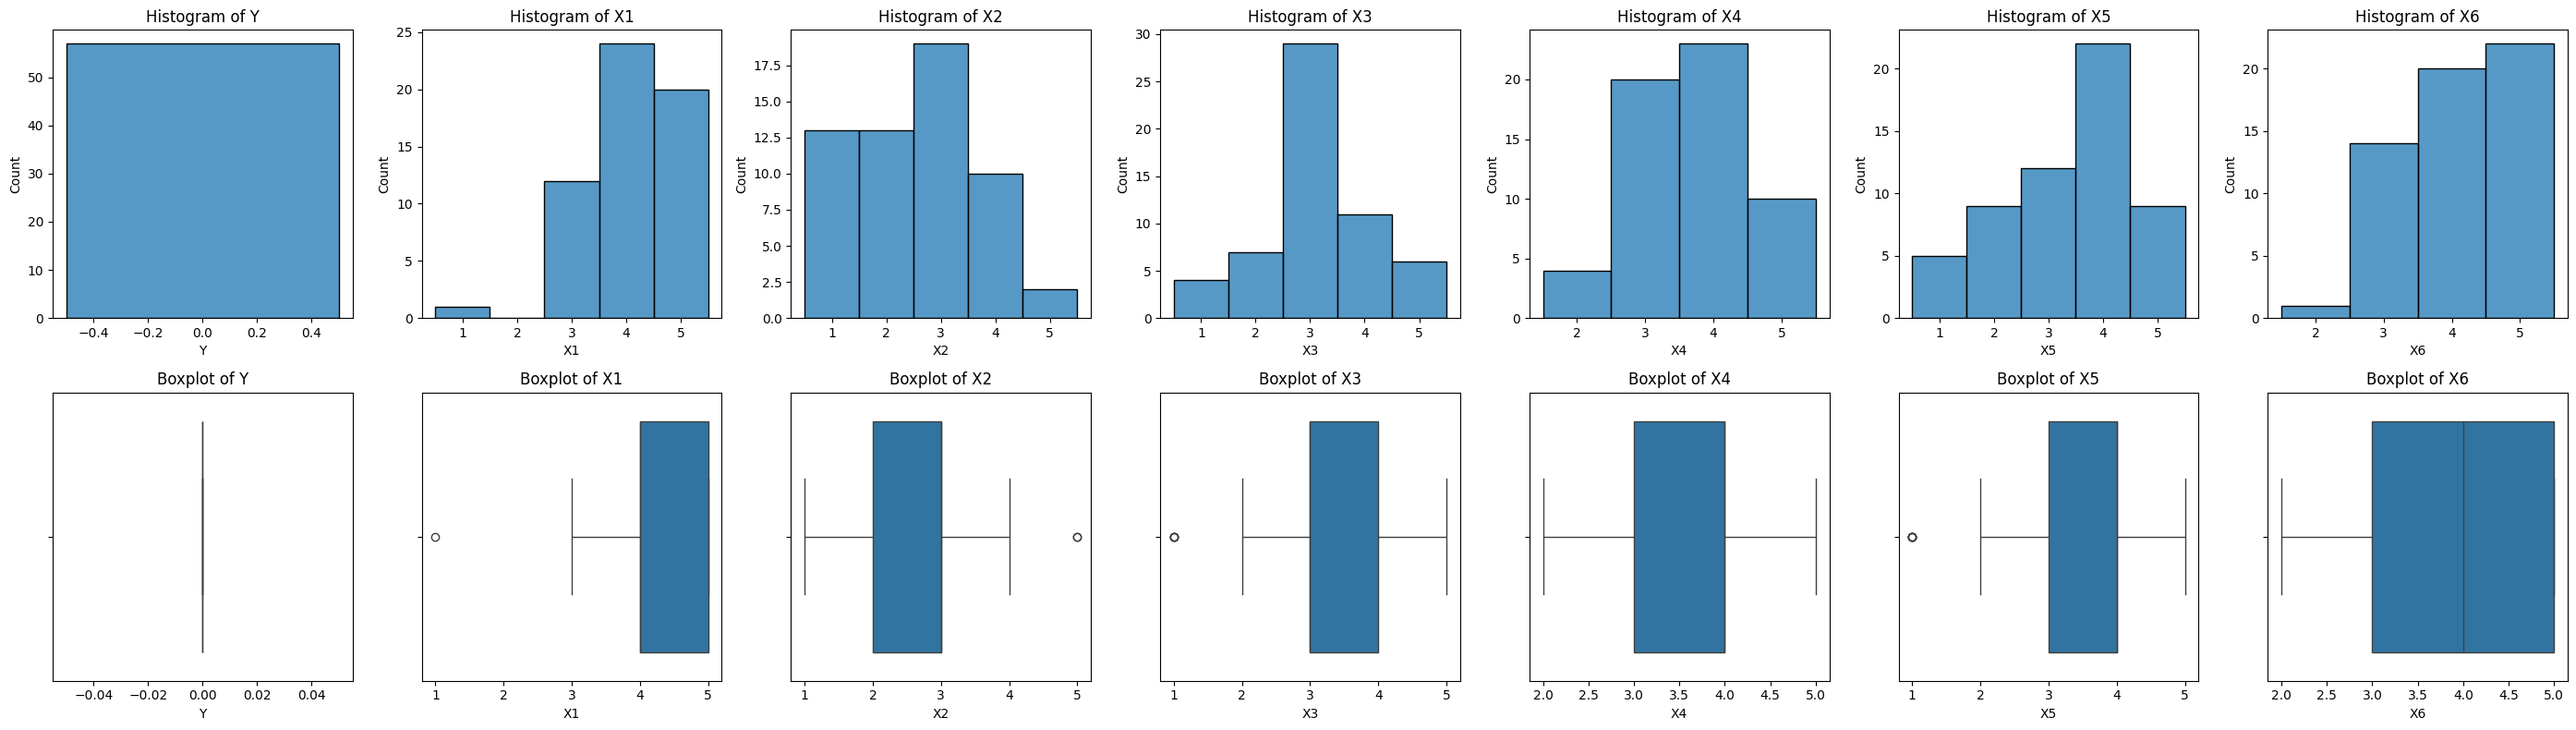

In [ ]:
plot_histograms_and_boxplots(unhappy_data)

## Happy Customers

In [ ]:
happy_data = data[data['Y'] == 1]
happy_data.head()

,Y,X1,X2,X3,X4,X5,X6
2,1,5,3,3,3,3,5
5,1,5,5,3,5,5,5
7,1,5,4,4,4,4,5
12,1,5,2,4,5,5,5
15,1,3,2,4,3,4,4


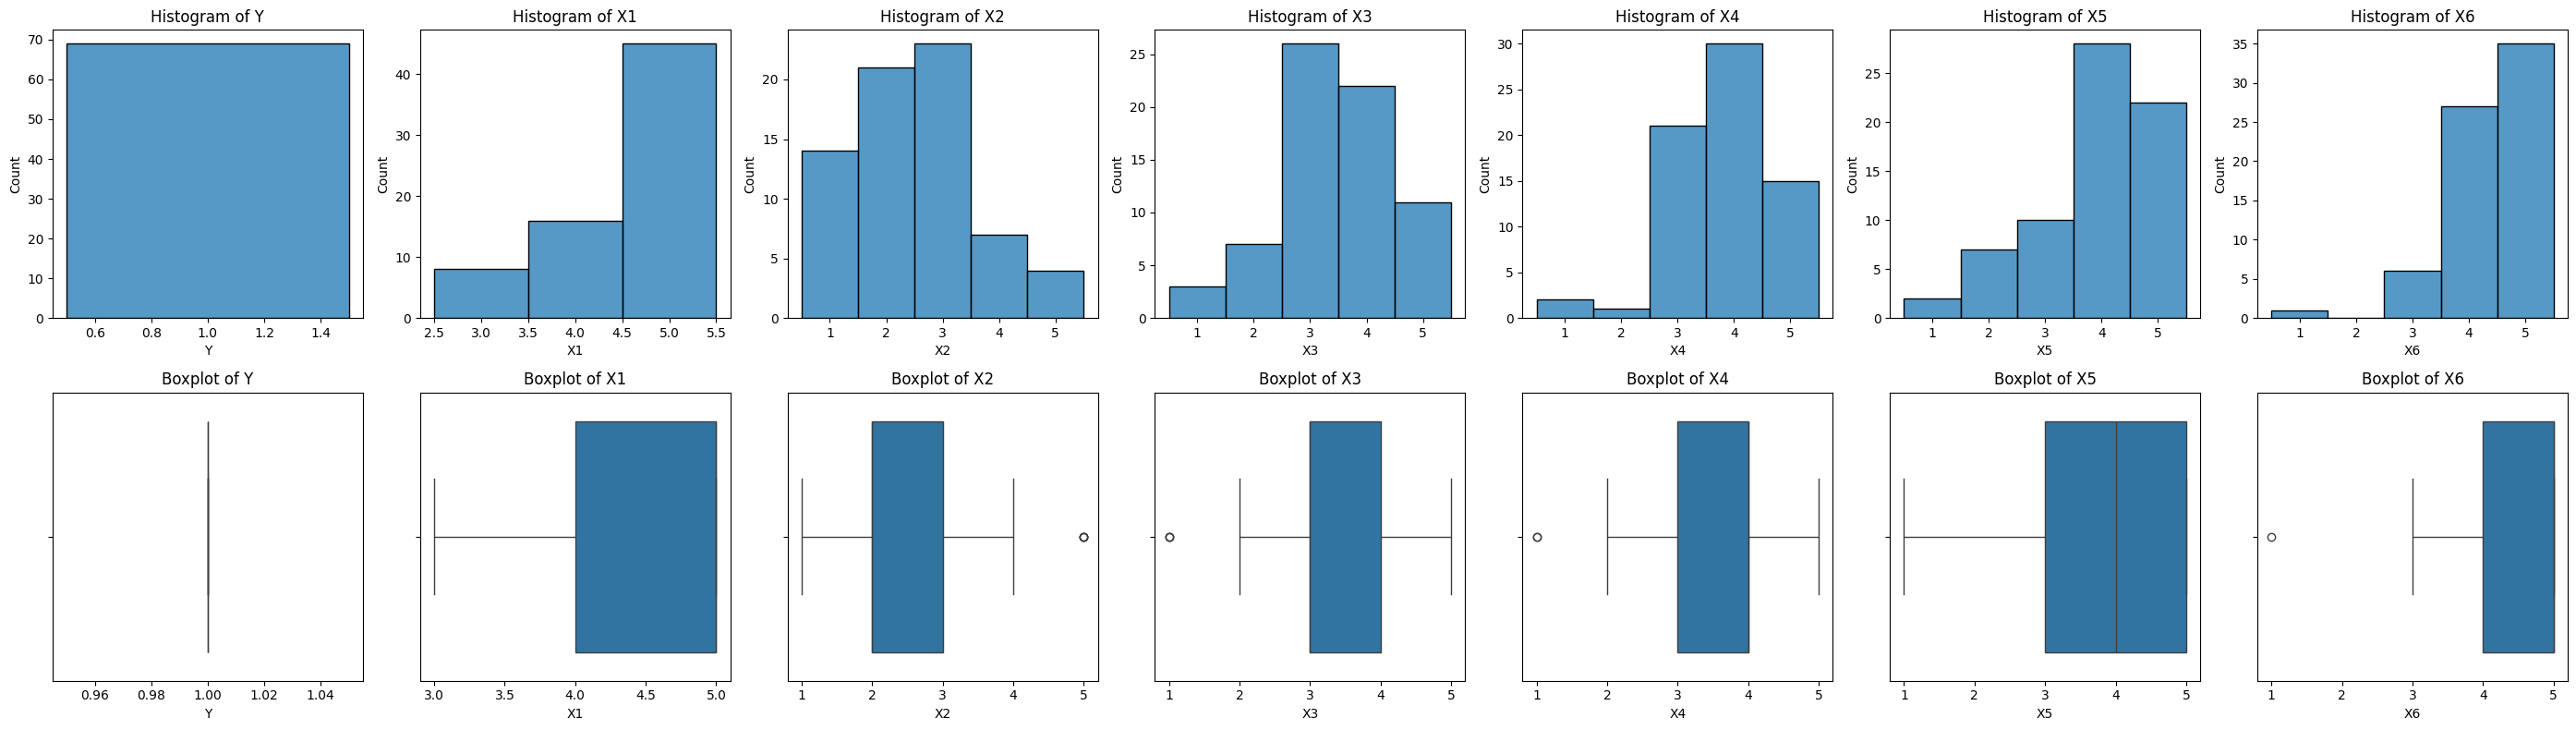

In [ ]:
plot_histograms_and_boxplots(happy_data)

## Observations

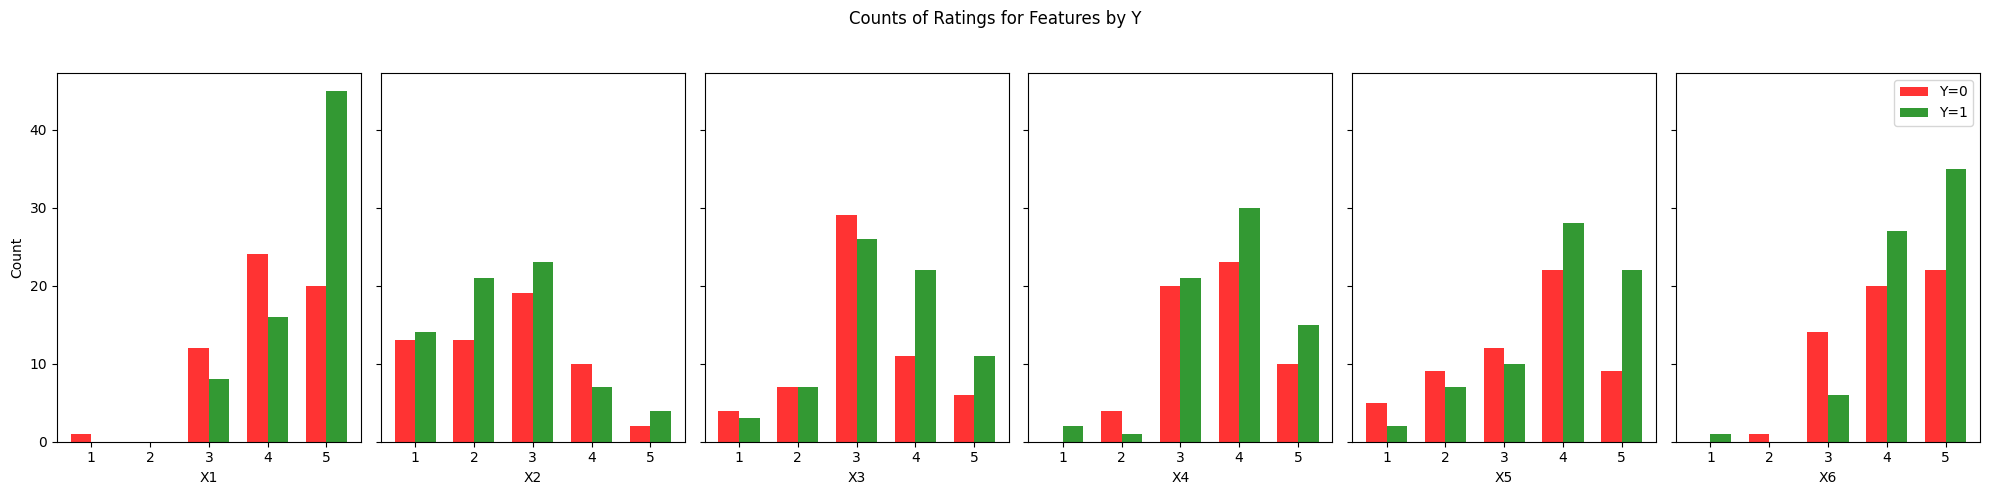

In [ ]:
# Define the feature columns
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

# Number of features
num_features = len(feature_columns)

# Create subplots
fig, axes = plt.subplots(1, num_features, figsize=(20, 5), sharey=True)

# Create a bar chart for each feature
for i, feature in enumerate(feature_columns):
    # Count the occurrences of each rating for Y=0 and Y=1
    counts_0 = unhappy_data[feature].value_counts().sort_index()
    counts_1 = happy_data[feature].value_counts().sort_index()

    # Ensure all ratings from 1 to 5 are included, even if their count is 0
    all_ratings = pd.Series([0, 0, 0, 0, 0], index=[1, 2, 3, 4, 5])
    counts_0 = all_ratings.add(counts_0, fill_value=0)
    counts_1 = all_ratings.add(counts_1, fill_value=0)

    # Create the bar chart
    index = counts_0.index
    bar_width = 0.35
    opacity = 0.8

    bars_0 = axes[i].bar(index - bar_width/2, counts_0, bar_width,
                         alpha=opacity, color='red', label='Y=0')
    bars_1 = axes[i].bar(index + bar_width/2, counts_1, bar_width,
                         alpha=opacity, color='green', label='Y=1')

    axes[i].set_xlabel(feature)
    axes[i].set_xticks(index)
    axes[i].set_xticklabels(index)
    if i == 0:
        axes[i].set_ylabel('Count')
    if i == num_features - 1:
        axes[i].legend()

fig.suptitle('Counts of Ratings for Features by Y')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

*  X1: < 3: Unhappy. > 4: High likelihood happy
*  X2: No clear pattern.
*  X3: > 3: High likelihood Happy
*  X4: > 3: High likelihood Happy
*  X5: > 3: High likelihood Happy
*  X6: > 3: High likelihood Happy

X1 gives the most information distinguishing happy and unhappy customers. All ratings below 5 have significantly more unhappy customers, and the 5 rating has significantly more happy customers.

X2, X3 and X4 hardly give any information distinguishing happy and unhappy customers. There is not much of a margin between happy and unhappy customers for each of the ratings. 100% of 1 ratings for X4 are happy customers, but there are not enough respondents with that rating to give any significant amount of information.

X5 gives some better information, because there is a significant margin between happy and unhappy customers for the 5 rating, but not for the other ratings.

X6 is even better because there is significant margin between happy and happy customers for ratings 3 and 5.


In [ ]:
X = data.drop('Y', axis=1)
y = data['Y']
X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


# Models

## Basic Predictions

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Make the test set 1/9 of the data set because 126 is divisible by 9.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/9, shuffle=True)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10),
    'Random Forest': RandomForestClassifier(min_samples_leaf=2, min_samples_split=10),
    'Extra Trees': ExtraTreesClassifier(min_samples_leaf=2, min_samples_split=10),
    'Gradient Boosting': GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=10),
    'SVC': SVC(kernel='poly', degree=2)
}

Metrics:



*   Accuracy: How well does model predictions match test data.
*   Precision: How well does model predict positive.
*   Recall: How well does capture positive labels.





Metric Importance:



*   Accuracy: Incorrect positive and negative predictions are dangerous.
*   Precision: Incorrect positive predictions are dangerous.
*   Recall: Incorrect negative predictions are dangerous.

We want customers to be happy, and almost half of the customers right now are unhappy. Incorrect happy predictions are dangerous. **Prioritize precision over accuracy over recall**, because incorrect negative predictions are merely an inconvenience.


In [ ]:
from sklearn.metrics import precision_score, accuracy_score

for model in models:
    models[model].fit(X_train, y_train)
    y_pred = models[model].predict(X_test)

    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model}: {precision:.2f}, {accuracy:.2f}")

Logistic Regression: 0.71, 0.64
KNeighborsClassifier: 0.56, 0.50
Decision Tree: 0.83, 0.71
Random Forest: 0.86, 0.79
Extra Trees: 0.67, 0.64
Gradient Boosting: 0.71, 0.64
SVC: 0.83, 0.71


Gradient Boosting is giving 83% precision. But it's not enough information to conclude it's the best model because the train-test split is random.

## Standardize Data

All features are already on the same scale (1-5), but it's good practice to standardize, especially when features are not on the same scale.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
for model in models:
    pipeline = Pipeline([
      ('scaler', scaler),
      ('classifier', models[model])
    ])

    models[model].fit(X_train, y_train)
    y_pred = models[model].predict(X_test)

    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model}: {precision:.2f}, {accuracy:.2f}")

Logistic Regression: 0.71, 0.64
KNeighborsClassifier: 0.56, 0.50
Decision Tree: 0.83, 0.71
Random Forest: 0.75, 0.71
Extra Trees: 0.67, 0.57
Gradient Boosting: 0.71, 0.64
SVC: 0.83, 0.71


As expected, standardizing does not change the results, as the features were on the same scale to begin with.

## Cross Validation

We can use 9 fold cross validation to make sure that gradient boosting precision is good across several train test splits. 9 fold cross validation is good not only because 126 is divisible by 9, but also because it will reduce bias (each model is trained on a larger portion of data) and variance (model is less dependent on a particular split).

The only downside to 9 fold cross validation is a higher computational cost, but it doesn't matter here because there are only 126 observations to begin with.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

kfold = KFold(n_splits=9, shuffle=True)

scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'accuracy': 'accuracy'
}

In [ ]:
from sklearn.model_selection import cross_validate

results_dict = {
    'Model': [],
    'Median Accuracy': [],
    'Std Accuracy': [],
    'Median Precision': [],
    'Std Precision': []
}

for model in models:
    pipeline = Pipeline([
      ('scaler', scaler),
      ('classifier', models[model])
    ])

    results = cross_validate(pipeline, X, y, cv=kfold, scoring=scoring)
    # Append the results to the dictionary
    results_dict['Model'].append(model)
    results_dict['Median Accuracy'].append(np.median(results['test_accuracy']))
    results_dict['Std Accuracy'].append(np.std(results['test_accuracy']))
    results_dict['Median Precision'].append(np.median(results['test_precision']))
    results_dict['Std Precision'].append(np.std(results['test_precision']))

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)
results_df

,Model,Median Accuracy,Std Accuracy,Median Precision,Std Precision
0,Logistic Regression,0.500000,0.129441,0.411111,0.174219
1,KNeighborsClassifier,0.500000,0.089087,0.500000,0.094130
2,Decision Tree,0.642857,0.154711,0.588889,0.171984
3,Random Forest,0.500000,0.117181,0.522222,0.122960
4,Extra Trees,0.571429,0.107069,0.625000,0.120344
5,Gradient Boosting,0.571429,0.099760,0.571429,0.136531
6,SVC,0.571429,0.091872,0.600000,0.166082


None of the models are giving a good precision score with cross validation. We know that not all questions distingush happy and unhappy customers well. Let's use questions X1 and X6, as they give the most information.

In [ ]:
from sklearn.model_selection import cross_validate

results_dict = {
    'Model': [],
    'Median Accuracy': [],
    'Std Accuracy': [],
    'Median Precision': [],
    'Std Precision': []
}

for model in models:
    pipeline = Pipeline([
      ('scaler', scaler),
      ('classifier', models[model])
    ])

    results = cross_validate(pipeline, X[['X1', 'X6']], y, cv=kfold, scoring=scoring)
    # Append the results to the dictionary
    results_dict['Model'].append(model)
    results_dict['Median Accuracy'].append(np.median(results['test_accuracy']))
    results_dict['Std Accuracy'].append(np.std(results['test_accuracy']))
    results_dict['Median Precision'].append(np.median(results['test_precision']))
    results_dict['Std Precision'].append(np.std(results['test_precision']))

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)
results_df

,Model,Median Accuracy,Std Accuracy,Median Precision,Std Precision
0,Logistic Regression,0.642857,0.095897,0.604167,0.120751
1,KNeighborsClassifier,0.714286,0.151002,0.791667,0.154580
2,Decision Tree,0.642857,0.157935,0.696970,0.162194
3,Random Forest,0.642857,0.141973,0.666667,0.202928
4,Extra Trees,0.714286,0.087662,0.800000,0.141564
5,Gradient Boosting,0.714286,0.082479,0.742424,0.051762
6,SVC,0.642857,0.121405,0.357143,0.243143


# Results

Extra Trees, Gradient Boosting, and K Nearest Neighbors are some great models. They have precisions greater than or equal to 73%, meaning that at least 73% of the predictions correctly predict a happy customer. These are the results for 1 standard devation (assuming scores are normally distributed):

Extra Trees: ExtraTreesClassifier(min_samples_leaf=2, min_samples_split=10)


*   0.80 +- 0.14 for precision
*   0.71 +- 0.19 for accuracy


Gradient Boosting: GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=10)


*   0.74 +- 0.05 for precision
*   0.71 +- 0.08 for accuracy

K Nearest Neighbors: KNeighborsClassifier()


*   0.79 +- 0.15 for precision
*   0.71 +- 0.15 for accuracy



A 1 standard deviation range gives 68% confidence that the metrics fall in these ranges.


Although Gradient Boosting gives the lowest number for precision, it is still the best model. The standard deviation for both precision and accuracy is the lowest among all three models. The 1 standard deviation confidence interval (68% confidence) is [0.69, 0.79] for precision, and [0.63,0.79] for accuracy.

Because we want customers to be happy, having low variance for the precision is very important.



# Conclusion

The goal of the project is to figure out which survey questions to focus on to make customers happy. We tried several models with a train-test split that would reduce bias and variance. We are aiming for a high precision score because it's important that there are as few false positives as possible.

The conclusion is that the GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=10) because the median precision is above 73%, and the standard devation is low. The 68% confidence interval of [0.69,0.79] gives us more certainty that the precision of future predictions will be close to the target 73% score.

The best questions are X1 and X6, as they give the most information about whether a customer is happy or not.

X1: My order was delivered on time.

X6: The app makes ordering easy for me.

The next step is to shorten the survey to these two questions and send it out to more customers. That way, we will get more data and confirm that these two questions are indeed what the company needs to focus on to make their customers happy.